<a href="https://colab.research.google.com/github/amillie100/MillerMan/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 10 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

### AdviseInvest Data Dictionary


| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |

### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [1]:
#Import libraries  🔧
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Initial Data Understanding

### Do the following:
 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [2]:
#Import the data 🔧
df = pd.read_csv('/content/adviseinvest_historical_data (1).csv')

In [3]:
#View the datatypes 🔧
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


None

In [4]:
#Describe the data 🔧
display(df.describe())

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


In [5]:
# Check for missing values
display(df.isnull().sum())

,0
answered,0
income,0
female,0
age,0
job,0
num_dependents,0
rent,0
own_res,0
new_car,2
chk_acct,0


In [6]:
# Check for duplicates
display(df.duplicated().sum())

np.int64(29035)

We can visualize the data to identify outliers. For example, we can use box plots for numerical variables.

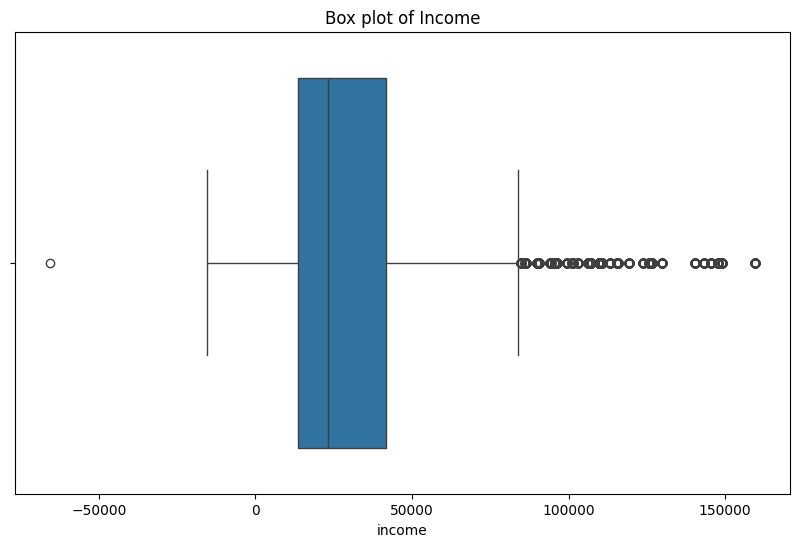

In [7]:
# Example: Box plot for 'income' to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['income'])
plt.title('Box plot of Income')
plt.show()

## Step 2: Data Preparation

### 2.1: Data Cleanup
- Remove any variables that are not relevant to our analysis (be sure not to delete too many variables, you may need them in the near future!)
- Clean up the data and put it in a new datafram named "df_clean"


In [8]:
#delete outliers 🔧
# Remove rows with income less than 0 or greater than the 99th percentile
df_clean = df[(df['income'] >= 0) & (df['income'] <= df['income'].quantile(0.99))]

# Remove rows with age greater than 90 (based on general knowledge and the describe output max age of 132)
df_clean = df_clean[df_clean['age'] <= 90]

# Remove rows with num_accts greater than the 99th percentile (based on the describe output max num_accts of 3345)
df_clean = df_clean[df_clean['num_accts'] <= df_clean['num_accts'].quantile(0.99)]

display(df_clean.describe())

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000,29241.000000,29243.000000,29243.000000,29243.000000,29243.000000,29243.000000
mean,0.551414,32752.100674,34.616113,1.914715,1.142222,0.210102,0.682659,0.238501,1.474712,0.953938,2.345724,0.091919,1.549225
std,0.497358,27384.803968,11.169149,0.651013,0.349284,0.407387,0.465449,0.426174,1.237620,1.482277,1.193947,0.288917,1.626648
min,0.000000,2760.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13520.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23230.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,40200.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,143180.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


In [9]:
#remove variables that are not helpful 🔧
df_clean = df_clean.drop('product', axis=1)

In [10]:
#cleanup any missing or non-standardized data 🔧
# Fill missing 'new_car' values with the mode
df_clean['new_car'] = df_clean['new_car'].fillna(df_clean['new_car'].mode()[0])

# Convert 'female' column to numerical using one-hot encoding
df_clean = pd.get_dummies(df_clean, columns=['female'], drop_first=True)

### 2.2: Standardize variables

 - Change "answered" to yes/no and make it categorical
 - Convert any variables that should be an integer into an integer

In [11]:
# Convert answered to categorical 🔧
df_clean['answered'] = df_clean['answered'].map({0: 'no', 1: 'yes'}).astype('category')

In [12]:
# Convert variables to integer data type 🔧
int_cols = ['income', 'age', 'job', 'num_dependents', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile']
for col in int_cols:
    df_clean[col] = df_clean[col].astype(int)

### 2.3 Convert variables to categorical

- Find at least 8 variables that would be appropriate to convert to categories

In [13]:
#Convert categorical variables 🔧
categorical_cols = ['job', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'mobile', 'female_1']
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')

# Step 3: Exploratory Data Analysis (EDA)

### Do the following:
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted



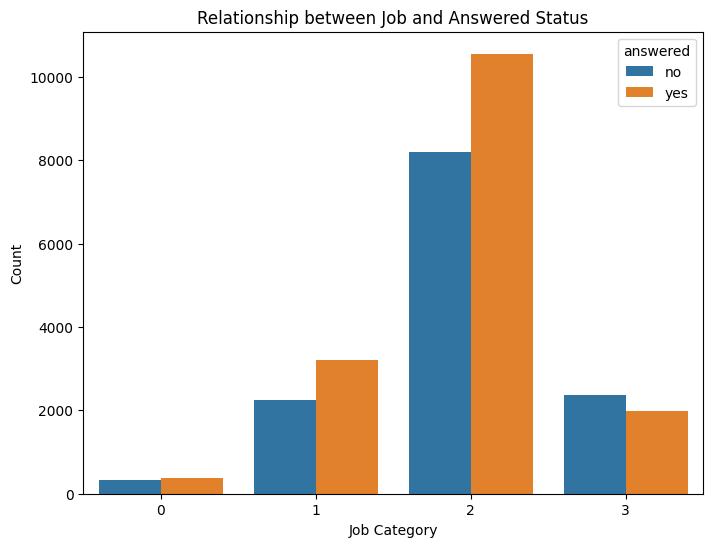

In [14]:
# Chart 1: Bar plot for 'answered' vs 'job'
plt.figure(figsize=(8, 6))
sns.countplot(x='job', hue='answered', data=df_clean)
plt.title('Relationship between Job and Answered Status')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.show()

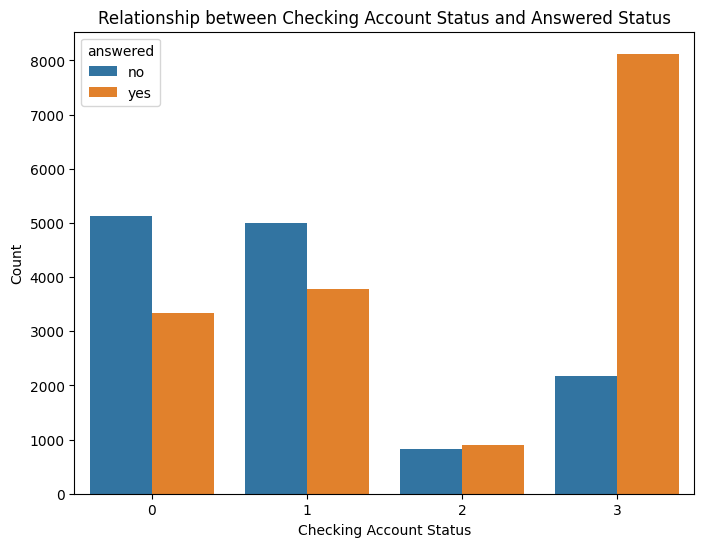

In [15]:
# Chart 2: Bar plot for 'answered' vs 'chk_acct'
plt.figure(figsize=(8, 6))
sns.countplot(x='chk_acct', hue='answered', data=df_clean)
plt.title('Relationship between Checking Account Status and Answered Status')
plt.xlabel('Checking Account Status')
plt.ylabel('Count')
plt.show()

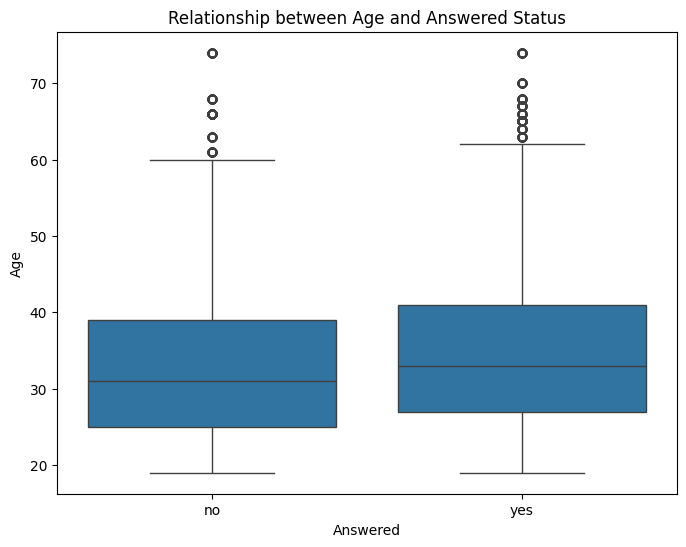

In [16]:
# Chart 3: Box plot for 'answered' vs 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='answered', y='age', data=df_clean)
plt.title('Relationship between Age and Answered Status')
plt.xlabel('Answered')
plt.ylabel('Age')
plt.show()

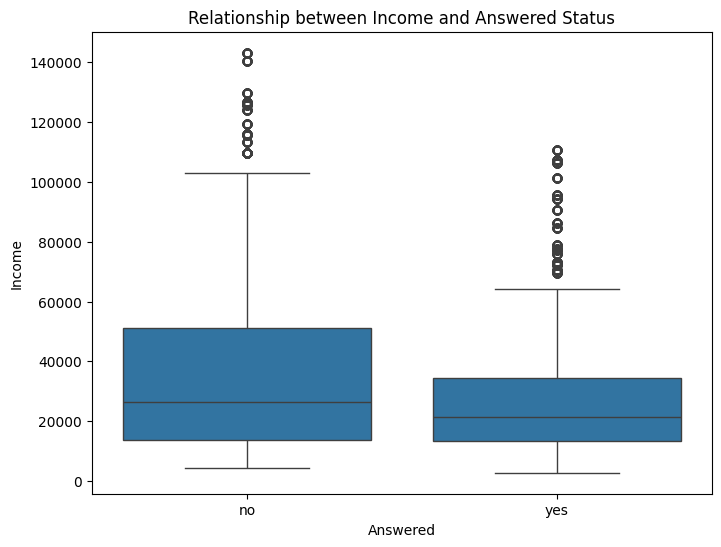

In [17]:
# Chart 4: Box plot for 'answered' vs 'income'
plt.figure(figsize=(8, 6))
sns.boxplot(x='answered', y='income', data=df_clean)
plt.title('Relationship between Income and Answered Status')
plt.xlabel('Answered')
plt.ylabel('Income')
plt.show()

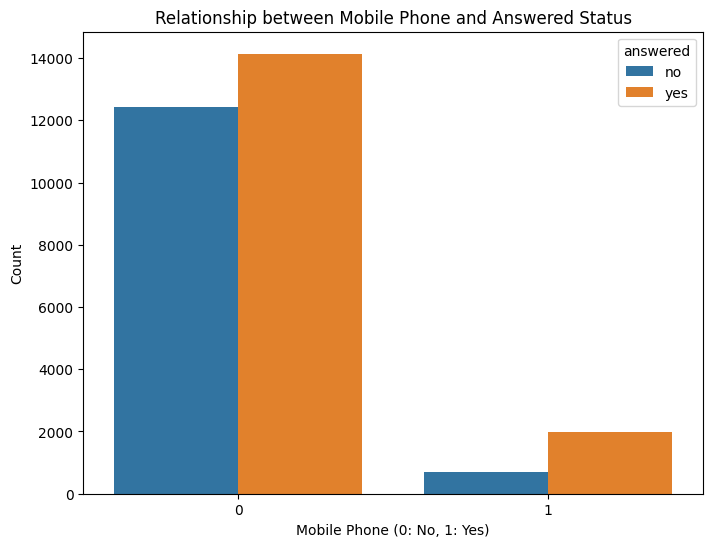

In [18]:
# Chart 5: Bar plot for 'answered' vs 'mobile'
plt.figure(figsize=(8, 6))
sns.countplot(x='mobile', hue='answered', data=df_clean)
plt.title('Relationship between Mobile Phone and Answered Status')
plt.xlabel('Mobile Phone (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

## Step 4: Modeling

### 4.1: Calculate the base probability of answering

If we use no model at all, how good is our chance of predicting someone leaving?  Use a calculation to find the chances of someone leaving.

In [19]:
#get the default probability 🔧
# Calculate the base probability of not answering
base_probability_not_answered = (df_clean['answered'] == 'no').sum() / len(df_clean)
print(f"Base probability of not answering: {base_probability_not_answered:.4f}")

Base probability of not answering: 0.4486


### 4.2: Split the training and testing datasets

- split df_clean using train_test_split function
- all variables except answered should be in the x variable
- answered is in the y variable


In [20]:
# Split data into training and testing sets 🔧
X = df_clean.drop('answered', axis=1)
y = df_clean['answered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3: Create a Decision Tree
- Use all available attributes (except those that were eliminated in step 3)
- It is recommended to use the type "entropy" and a max_depth of 4

In [21]:
#create a tree  🔧
# Create a Decision Tree classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [22]:
# Install graphviz
!pip install graphviz

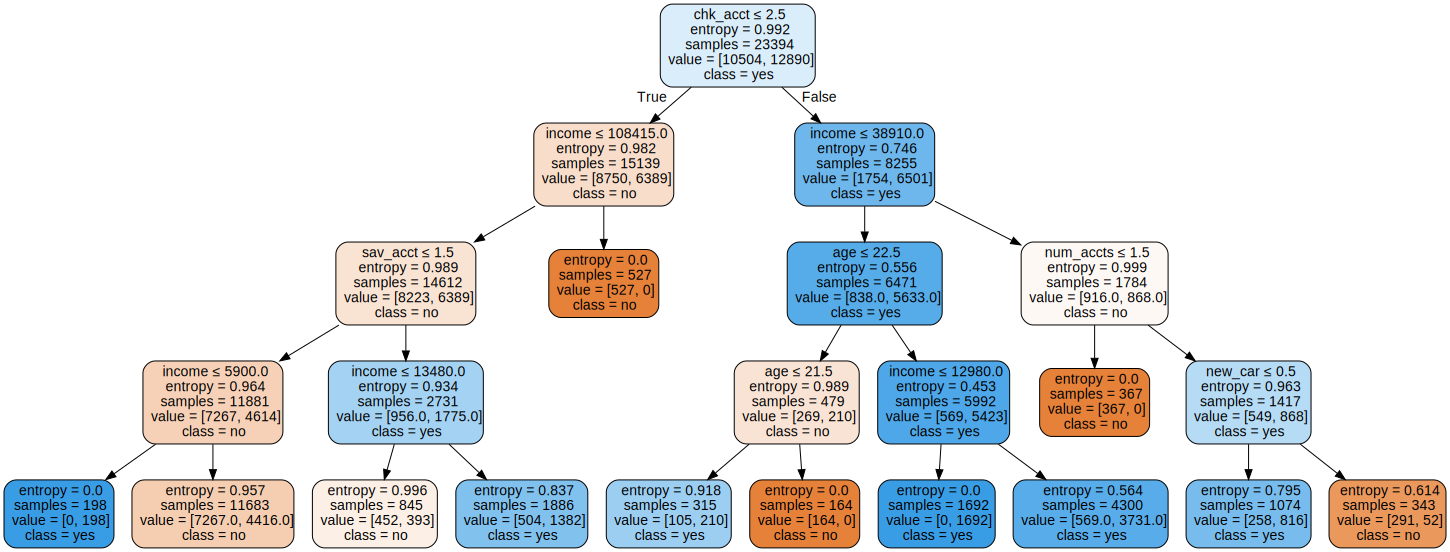

In [23]:
#display (visualize) the tree 🔧
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=['no', 'yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

### 4.4: What is the accuracy?

This should be better than the base probability, or you have failed in your objective

In [24]:
#calculate the probability for your tree 🔧
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.4f}")

Accuracy of the Decision Tree model: 0.7307


### 4.5: Create a confusion matrix

This will show false positives, true positives, etc.

In [25]:
#create a basic confusion matrix 🔧
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[2258,  356],
       [1219, 2016]])

Create a more visual, interpretable version of the matrix

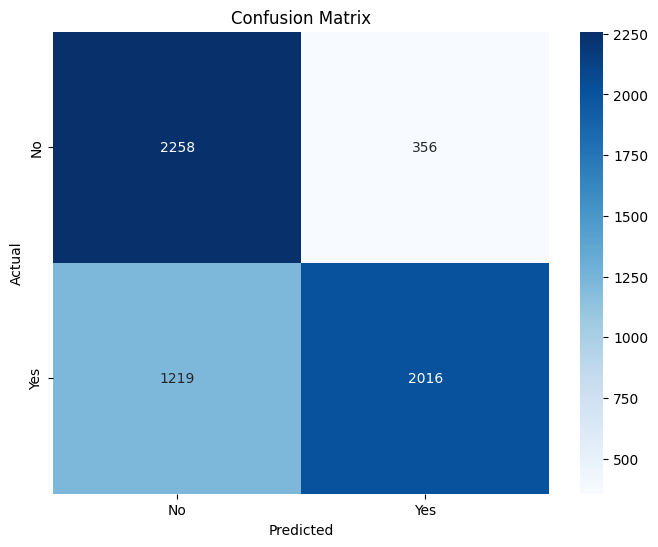

In [26]:
#Create a beautiful matrix; hint - try using Seaborn Heatmap 🔧
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Evaluate the Model

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model "answered" in this case is therefore equivalent to modeling "purchased."

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### 5.1 Calculate the Profit Using the Model

In [27]:
# Write a calcuation for the profit from your model 🔧
# Assuming the confusion matrix is in the format [[TN, FP], [FN, TP]]
TN, FP, FN, TP = cm.ravel()

profit_model = (TP * 75) - (FP * 25)
print(f"Profit using the model: ${profit_model}")

Profit using the model: $142300


### 5.2 Compare to the Default Profit

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives treat the customers who do not answer as false positives.

In [28]:
#Write a calculation for the overall profit without using the model (default) 🔧
# In the baseline case, all customers are called.
# True positives are the customers who actually answered.
# False positives are the customers who did not answer.
actual_answered = (df_clean['answered'] == 'yes').sum()
actual_not_answered = (df_clean['answered'] == 'no').sum()

profit_default = (actual_answered * 75) - (actual_not_answered * 25)
print(f"Profit without using the model (default): ${profit_default}")

Profit without using the model (default): $881425


### 5.3 Tune the Model
- Adjust the size or shape of the tree, then test the accuracy
- Keep changing these parameters until you end up with a tree with accuracy that is better than the initial model

In [29]:
# Create a new version of the tree with new parameters 🔧
# Create a new Decision Tree classifier with a different max_depth
model_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Train the new model
model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [30]:
# Calculate a new probability 🔧
y_pred_tuned = model_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy of the tuned Decision Tree model: {accuracy_tuned:.4f}")

Accuracy of the tuned Decision Tree model: 0.7617


### 5.4 Apply the Model to New Customers
- Import the "adviseinvest_new_customer_data.csv" file
- Using the tree model, predict each customer for the target variable  by feeding the new customer data into the model

In [31]:
#Import new customer data into a new data frame
df_new_customers = pd.read_csv('/content/adviseinvest_new_customer_data (1).csv')

In [32]:
#Predict the number of customers who will be yes/no for the target variable 🔧
# Preprocess new customer data (assuming the same preprocessing steps as the training data)
# Handle the 'female' column using one-hot encoding
df_new_customers = pd.get_dummies(df_new_customers, columns=['female'], drop_first=True)

# Ensure all columns present in training data are also in new customer data, fill missing with 0
missing_cols = set(X_train.columns) - set(df_new_customers.columns)
for c in missing_cols:
    df_new_customers[c] = 0
# Ensure the order of columns is the same
df_new_customers = df_new_customers[X_train.columns]

# Predict on the new customer data using the tuned model
new_customer_predictions = model_tuned.predict(df_new_customers)

# Add the predictions to the new customer DataFrame
df_new_customers['predicted_answered'] = new_customer_predictions

# Display the number of predicted 'yes' and 'no'
display(df_new_customers['predicted_answered'].value_counts())

,count
predicted_answered,
no,529
yes,471


# Step 6: Conclusion
### 6.1: Did we improve our profit using the model?  

\Write your conclusion notes below:  🔧 No, the profit using the model was 142,300 compared to 881,425. Using the model resulted in a significantly lower profit.

### 6.2: How could the model be utilized by the business?



Write your recommendations below:  🔧
The model can help prioritize which customers to call first. Customers predicted to answer could be contacted earlier in the hour window, potentially increasing the chances of a successful connection.
The model also provides insights into which customer characteristics are associated with answering the call. This information can inform staffing decisions or marketing efforts to target customers more likely to answer.
The model's predictions can be used for further analysis. For example, the business could investigate why customers predicted to answer did not, or explore different strategies for engaging customers predicted not to answer.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [33]:
!jupyter nbconvert --to html "assignment_10_MillerAaron.ipynb"

[NbConvertApp] Converting notebook assignment_10_MillerAaron.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 643422 bytes to assignment_10_MillerAaron.html
